# Taller de Manejo y Análisis de Datos
# Pauta Prueba
**Profesores:** Pedro Montealegre (p.montealegre@uai.cl) y Roberto León (roberto.leonv@edu.uai.cl)

**Fecha de publicación:** miércoles 12 de octubre a las 9:00.

**Fecha de entrega:** miércoles 12 de octubre a las 17:30 vía webcursos.

# Actividad 1

Adjunto a este cuaderno Jupyter, se entrega de una base de datos en un archivo llamado `datos_caudal.csv`, el cual contiene cinco variables cuantitativas hidrológicas para predecir niveles de caudal de un determinado río en distintas distintos tiempos.

En esta actividad analizaremos esta base de datos. 

## Pregunta 1  - 0.5 puntos

Importe la librería Pandas. A continuación cargue la base de datos y guárdelos en un DataFrame. Visualice las primeras líneas. 

In [58]:
#Respuesta Actividad 1
import pandas as pd
df = pd.read_csv("datos_caudal.csv")
df.head()

,Var1,Var2,Var3,Var4,Var5,Caudal
0,3.85,3.86,3.76,3.65,0.0,3.69
1,3.86,3.76,3.65,3.69,0.0,3.61
2,3.76,3.65,3.69,3.61,0.0,3.54
3,3.65,3.69,3.61,3.54,0.0,3.48
4,3.69,3.61,3.54,3.48,0.0,3.44


## Pregunta 2 - 0.5 puntos

Escriba un programa que genere un Dataframe cuyas columnas sean las mismas que las de la base de datos original, y cuyas filas correspondan al promedio, mediana y desviación estándar de cada columna.

In [59]:
# Escriba aquí su solución
df1 = df.describe()
df1.iloc[[1,5,2],:]

,Var1,Var2,Var3,Var4,Var5,Caudal
mean,15.118808,15.119178,15.119530,15.119891,4.930822,15.120226
50%,8.900000,8.900000,8.900000,8.900000,0.000000,8.900000
std,25.518960,25.518815,25.518676,25.518533,15.153068,25.518397


## Pregunta 3 - 1 punto

Un experto opina que una buena predicción para el caudal es considerar el promedio de las primeras tres variables. 


* Agregue una columna denominada `Caudal_pred` que indique este promedio.  
* Agregue una columna `Error_pred` que contenga la diferencia en valor absoluto entre el caudal real y la predicción. 
* Grafique en una misma figura la evolución de la variable `Caudal` y `Caudal_pred`.

In [60]:
# Escriba aquí su solución
import numpy as np
df["Caudal_pred"] = (df["Var1"] + df["Var2"] + df["Var3"]) / 3
df["Error_pred"] = np.abs(df["Caudal"] - df["Caudal_pred"])

<AxesSubplot:>

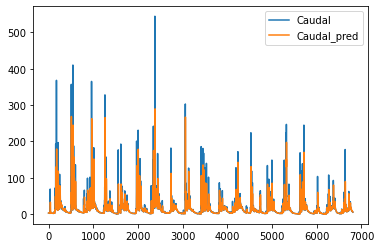

In [61]:
df.plot(y = ["Caudal","Caudal_pred"])

## Pregunta 4 - 2 puntos

Según los expertos, un caudal menor que 5 es considerado bajo, un caudal mayor o igual que 5 pero menor que 10 es considerado medio, y un caudal mayor o igual que 10 es considerado alto. 

* Agregue una columna denominada nivel que indique el nivel del caudal. 
* Haga un gráfico de torta con la frecuencia de los distintos niveles. 
* Haga un gráfico de barras con la frecuencia de los distintos niveles. 

array([<AxesSubplot:ylabel='nivel'>], dtype=object)

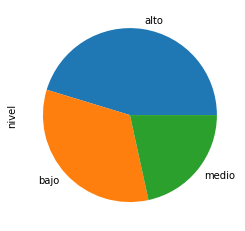

In [90]:
# Escriba aquí su solución
import matplotlib.pyplot as plt

def nivel(valor):
    if valor < 5: return "bajo"
    elif valor < 10: return "medio"
    else: return "alto"

n = df.count()[0]
df["nivel"] = pd.Series([0]*n)
for i in range(n):
    df.iloc[i,8] = nivel(df.iloc[i,5])

df["nivel"].value_counts().plot(kind="pie",subplots=True)

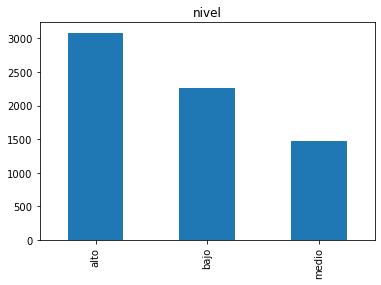

In [91]:
df["nivel"].value_counts().plot(kind="bar",subplots=True);

# Activiadad 2


Una universidad ha instaurado el siguiente reglamento de evaluaciones. Todas las asignaturas deben tener tres pruebas y un examen. Las notas van entre 0 y 10, con un decimal.
Despues de las tres pruebas, los alumnos con promedio menor que 3 reprueban y los con promedio mayor o igual que 7 aprueban. El resto va al examen, en el que deben obtener por
lo menos un 5 para aprobar.
Además, se decidió que los alumnos que obtienen menos de un 2 en las dos primeras pruebas están automáticamente reprobados. A su vez, los que obtienen más de un 9 en las dos primeras pruebas están automáticamente aprobados. En ambos casos, no deben rendir la tercera prueba ni el examen.

Escriba un programa que pregunte a un estudiante las notas de las evaluaciones que rindió, y le muestre si está aprobado o reprobado. Su función no debe esperar a que se ingresen todas las notas si con la información ingresada se puede decidir la aprobación o reprobación. 

Ejemplos:

```
P1: 1.8
P2: 0.9
Reprobado
```

```
P1: 0.5
P2: 2.0
P3: 2.5
Reprobado
```

```
P1: 1.5
P2: 3.5
P3: 4.5
Examen: 5.1
Aprobado
```

```
P1: 9.3
P2: 9.4
Aprobado
```

In [99]:
# Escriba aquí su solución

P1 = float(input("P1: "))
P2 = float(input("P2: "))
Promedio = (P1 + P2)/2
if(P1 < 2 and P2 < 2):
    print("Reprobado")
elif(P1 > 9 and P2 > 9):
    print("Aprobado")
else:
    P3 = float(input("P3: "))
    promedio = (P1 + P2 + P3)/3
    if(promedio < 3):
        print("Reprobado")
    elif(promedio >= 7):
        print("Aprobado")
    else:
        Ex = float(input("Examen: "))
        if(Ex >= 5.0):
            print("Aprobado")
        else:
            print("Reprobado")
        

P1: 9.1
P2: 9.2
Aprobado


## Indicaciones

* Su entrega deberá consistir en una versión de este archivo Jupyter editado en el campo indicados anteriormente. 
* Es de su responsabilidad entregar el archivo en el formato indicado.  
* No se puede modificar las bases de datos entregadas. Es decir, su programa debe funcionar con los archivos tal cual se publicaron en webcursos.
* El código debe ser ordenado y comentado adecuadamente. Las variables deben tener nombres que representen su uso.
* La entrega es vía webcursos, solo hasta la fecha indicada al comienzo. No se aceptan entregas atrasadas.

## Recomendaciones:
* Antes de entregar vaya a `Kernel -> Restart & Clear Output` y luego ejecute nuevamente los bloques asegurandose que ninguno arroje errores.